In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline

(1797, 64)


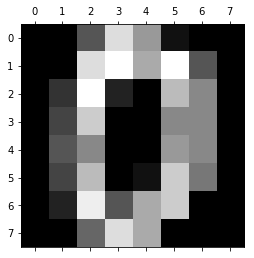

In [3]:
digits = load_digits()
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

### Определите модель с наилучшим показателем метрики accuracy, используя различные модели и варьируя их параметры.

Что мы имеем:
Обучающиеся алгоритмы. Возьмем только изученные из пакета sklearn:

0. linear_model.LogisticRegression(http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
1. linear_model.SGDClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
2. ensemble.RandomForestClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
3. ensemble.BaggingClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
4. ensemble.ExtraTreesClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
5. ensemble.AdaBoostClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
6. neighbors.KNeighborsClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
7. tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
8. tree.ExtraTreeClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html)


In [4]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

Теперь подготовим данные для обучения, для этого разобъем данные на обучающую и тестовую выборку

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target)

Теперь надо подготовить разные наборы параметов для обучения, для этого для каждого алгоритма нужно прописать серию параметов которые мы будем менять. Начнем по порядку:

#### linear_model.SGDClassifier http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
Основные параметры: 
- loss : str, default: ‘hinge’
Функция потерь
Возможные параметры для классификации: 

1. ‘hinge’ - кусочно-линейная функция потерь (или hinge loss). Которая зануляется на тех объектах, которые достаточно далеко от разделяющей поверхности
2. ‘log’ - $$\large logloss = - \frac{1}{l} \cdot \sum_{i=1}^l (y_i \cdot log(\hat y_i) + (1 - y_i) \cdot log(1 - \hat y_i))$$  

можно представить минимизацию logloss как задачу максимизации accuracy путем штрафа за неверные предсказания. Однако необходимо отметить, что logloss крайне сильно штрафует за уверенность классификатора в неверном ответе.

3. ‘modified\_huber’ - Функция потерь Хьюбера — это функция потерь, используемая в устойчивой регрессии, которая менее чувствительна к выбросам, чем квадратичная ошибка. ( https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_%D0%A5%D1%8C%D1%8E%D0%B1%D0%B5%D1%80%D0%B0 )
4. ‘squared_hinge’ - квадратичная функция потерь
5. ‘perceptron’ - ХЗ что это за функция такая


- penalty : str,
Нормализация, т.е. штраф за выбросы
Возможные параметры:
‘none’, ‘l2’, ‘l1’, ‘elasticnet’

- alpha : float

Мультипликатор/множитель регуляризации. По умолчанию 0.0001 Так же используется для learning_rate когда он задан как ‘optimal’.

- max_iter : int, optional

Максимальное кол-во проходов по тренировочным данным 

- tol : float or None, optional

Критерий остановки. Если None то остановка произойдет при условии (loss > previous_loss - tol)

- shuffle : bool, optional

Будут ли перемешаны данные после каждой эпохи/прохода. Defaults to True.

- epsilon : float

Указывает на интенсивность действия функции потерь. Только для функций потерь ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’. Для «huber» определяет порог, при котором становится менее важным получить правильное предсказание. Для эпсилон-чувствительности любые различия между текущим прогнозом и правильной меткой игнорируются, если они меньше этого порога.

- learning_rate : string, optional

Тип скорости обучения. 
Возможные значения:
‘constant’: eta = eta0
‘optimal’: eta = 1.0 / (alpha * (t + t0)) [default]
‘invscaling’: eta = eta0 / pow(t, power_t)

- eta0 : double

Начальная скорость обучения для типов скорости обучения «constant» или «invscaling». Значение по умолчанию равно 0.0, так как eta0 не используется в типе по умолчанию ‘optimal’

- class_weight : dict, {class_label: weight} or “balanced” or None, optional

Предустановлен для параметра fit_weight. Веса, связанные с классами. Если не указано, все классы должны иметь вес один. «balanced» режим использует значения y для автоматической регулировки весов, обратно пропорциональных частотам класса во входных данных, как  n_samples / (n_classes * np.bincount(y))





##### Создадим набор (структуру) для изменения параметров для grid

In [6]:
SGDClassifier_data = {
    "model" : SGDClassifier(),
    "params" : {
        "loss" : ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
        "penalty" : ['none', 'l2', 'l1', 'elasticnet'],
        "alpha" : [10**float(c) for c in np.arange(-5,-3)],
        "shuffle" : [True, False],
        "epsilon" : [10**float(c) for c in np.arange(-5,0)],
        "learning_rate" : ["constant", "optimal","invscaling"],
        "eta0" : [10**float(c) for c in np.arange(-5,0)],
        "class_weight" : ["balanced", None],
#         "max_iter" : np.linspace(5, 20, 10) # запишем сразу сюда то что получилось,а то больно долго считать еще раз
    }
}

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


#### linear_model.LogisticRegression http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
Основные параметры: 
- penalty : str, default: ‘l2’
Нормализация, т.е. штраф за выбросы
Возможные параметры:
‘l2’, ‘l1’

- dual : bool, default: False
ХЗ что это, похоже на какой то двойной доп штраф когда количество фичей больше кол-ва примеров. По умолчанию выключено.
Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.

- tol : float, default: 1e-4
Tolerance - критерий остановки

- C : float, default: 1.0
Инвертированный коэффициент штрафа для регулляризации

- class_weight : dict or ‘balanced’, default: None
Либо в ручную засовываем веса для классов, либо выбираем balanced или никак не взвешиваем классы
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
“balanced” режим использует значения y для автоматической корректировки весов, обратно пропорциональных частотам класса во входных данных, как n_samples / (n_classes * np.bincount(y)).

- solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’ 
Алгоритм для решения оптимизационных проблем:
Для маленьких выборок ‘liblinear’ - хороший выбор, в то время как ‘sag’ и ‘saga’ гораздо быстрее для больших выборок.
Для мультиклассовых задач используется только ‘newton-cg’, ‘sag’, ‘saga’ и ‘lbfgs’

‘liblinear’ ограничен схемой один против всех.

‘newton-cg’, ‘lbfgs’ и ‘sag’ обрабатывают только L2 нормализацию, в то время как ‘liblinear’ и ‘saga’ обрабатывают L1 нормализацию.

- max_iter : int, default: 100
Используется только для newton-cg, sag и lbfgs решателей. Максимальное количество итераций, принятых для решателей.

- multi_class : str, {‘ovr’, ‘multinomial’}, default: ‘ovr’
Если выбранно ‘ovr’, то двоичная проблема обучается на каждой метке. Кроме того, минимизация потерь - это многочленная потеря, соответствующая всему распределению вероятности. Не работает для liblinear solver.

##### Создадим набор (структуру) для изменения параметров для grid

In [7]:
LogisticRegression_data = {
    "model" : LogisticRegression(),
    "params" : {
#         "penalty" : ['l2', 'l1'],
        "tol" : [10**float(c) for c in np.arange(-6,0)],
        "C" : 10**np.linspace(-3, 1, 10),    
        "class_weight" : ["balanced", None],
        "solver" : ['newton-cg', 'sag', 'saga' , 'lbfgs'],
#         "max_iter" : np.linspace(100, 1000, 10) #запишем сразу сюда то что получилось,а то больно долго считать еще раз
    }
}

#### tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
#### tree.ExtraTreeClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html)
##### Имеют одинаковые параметры

- criterion : string, optional (default=”gini”)
Функция для измерения качества разделения. Поддерживаются “gini” и “entropy”.

- splitter : string, optional (default=”best”)
Статегия выбора разделения. Поддерживается “best” для выбора лучшего разделения и “random” для случайного.

- max_depth : int or None, optional (default=None)
Максимальная глубина дерева. Если None, то узлы разкрываются до тех пор, пока все листья не станут содержать в себе один элемент или пока все листья не будут содержать меньше, чем min_samples_split.

- min_samples_split : int, float, optional (default=2)
Минимальное количество выборок, необходимых для разделения внутреннего узла: Если int, то берется min_samples_split как минимальное число. Если float, то min_samples_split - это процент минимального количества выборок для каждого разделения.

- min_samples_leaf : int, float, optional (default=1)
Минимальное количество образцов, которые должны быть у листового узла: Если int, тогда считайте min_samples_leaf как минимальное число. Если float, то min_samples_leaf - это процент минимального количества выборок для каждого узла.

- max_features : int, float, string or None, optional (default=None)
Количество функций, которые нужно учитывать при поиске лучшего раскола: 
  + Если int, то max_features в каждом раздвоении. 
  + Если float, то max_features - это процент, а int (max_features * n_features) функции учитываются при каждом расколе. 
  + Если «auto», то max_features = sqrt (n_features). 
  + Если «sqrt», то max_features = sqrt (n_features). 
  + Если «log2», то max_features = log2 (n_features). 
  + Если None, то max_features = n_features.

- max_leaf_nodes : int or None, optional (default=None)
Вырастите дерево с max_leaf_nodes наилучшим образом. Наилучшие узлы определяются как относительное уменьшение примеси. Если None, то неограниченное количество листовых узлов.

- min_impurity_decrease : float, optional (default=0.)
Узел будет разделен, если этот это приведет к уменьшению примеси, большему или равному этому значению. 

- class_weight : dict, list of dicts, “balanced” or None, default=None

- presort : bool, optional (default=False)
Предназначать ли предварительные данные для ускорения поиска лучших расщеплений при подгонке. Для настроек по умолчанию дерева решений для больших наборов данных установка этого значения в true может замедлить процесс обучения. При использовании либо меньшего набора данных, либо ограниченной глубины, это может ускорить обучение.


In [8]:
DecisionTreeClassifier_data = {
    "model" : DecisionTreeClassifier(),
    "params" : {
        'criterion' : ["gini", "entropy"],
        'splitter' : ["best", "random"],
        'max_depth' : [10, 15, 30 , None],
        'min_samples_split' : [2,3,4,5],
        'min_samples_leaf' : [1,2,3,4,5],
#         'max_features' : [2,4,6,8,10 , 25.0, 50.0, 75.0, "auto", "sqrt", "log2" , None],
#         'max_leaf_nodes' : [10000, 5000, 1000, 500, 100, 50, 10, None],
#         'presort' : [True, False]
    }
}

In [9]:
ExtraTreeClassifier_data = {
    "model" : ExtraTreeClassifier(),
    "params" : {
        'criterion' : ["gini", "entropy"],
        'splitter' : ["best", "random"],
        'max_depth' : [10, 15, 30 , None],
        'min_samples_split' : [2,3,4,5],
        'min_samples_leaf' : [1,2,3,4,5],
#         'max_features' : [2,4,6,8,10 , 25.0, 50.0, 75.0, "auto", "sqrt", "log2" , None],
#         'max_leaf_nodes' : [10000, 5000, 1000, 500, 100, 50, 10, None],
#         'presort' : [True, False]
    }
}

#### neighbors.KNeighborsClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

	
- n_neighbors : int, optional (default = 5)
Количество соседей 
- weights : str or callable, optional (default = ‘uniform’)
Весовая функция, используемая при прогнозировании. Возможные значения:
  + ‘uniform’ : однородные веса. Все точки в каждой окрестности взвешены одинаково.
  + ‘distance’ : весовые точки на обратном их расстоянии. в этом случае более близкие соседи точки запроса будут иметь большее влияние, чем соседние соседи, которые находятся дальше.
  + [callable] : пользовательская функция, которая принимает массив расстояний и возвращает массив той же формы, содержащий вес.
- algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional
Алгоритм, используемый для вычисления ближайших соседей: ‘ball_tree’, ‘kd_tree’, ‘brute’, ‘auto’
- leaf_size : int, optional (default = 30)
Размер листа для BallTree или KDTree. Это может повлиять на скорость построения и запроса, а также на память, необходимую для хранения дерева. Оптимальное значение зависит от характера проблемы
- p : integer, optional (default = 2)
Параметр мощности для метрики Минковского. При p = 1 это эквивалентно использованию manhattan_distance (l1) и euclidean_distance (l2) для p = 2. Для любого p используется minkowski_distance (l_p).
- metric : string or callable, default ‘minkowski’
- metric_params : dict, optional (default = None)
- n_jobs : int, optional (default = 1)

In [10]:
KNeighborsClassifier_data = {
    "model" : KNeighborsClassifier(),
    "params" : {
        'n_neighbors' : list(range(1,20,3)),
        'weights' : ["uniform","distance"],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : list(range(10,100,10)),
        'p' : [1,2]
    }
}

#### ensemble.RandomForestClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
#### ensemble.ExtraTreesClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
##### Имеют одинаковые параметры

Опишем параметры которые касаются именно Ансамблей, а не деревьев. Параметры деревьев можно посмотреть выше или по ссылкам tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
tree.ExtraTreeClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html)¶

- n_estimators : integer, optional (default=10)
Количество деревьев из которых будет строиться лес.

- bootstrap : boolean, optional (default=True)
Используются ли бутстрап-образцы при построении деревьев. Бутстрапинг - это практика оценки свойств оценки (например, ее дисперсия) путем измерения этих свойств при выборке из аппроксимирующего распределения. Одним из стандартных вариантов аппроксимирующего распределения является эмпирическая функция распределения наблюдаемых данных. В случае, когда набор наблюдений можно предполагать от независимой и одинаково распределенной совокупности, это можно реализовать, построив ряд повторных образцов с замещением наблюдаемого набора данных (и равного размера наблюдаемому набору данных).

- oob_score : bool (default=False)
Использовать ли образцы out-of-bag для оценки точности обобщения. 
- verbose : int, optional (default=0)
Управляет многословием процесса построения дерева. **ХЗ что это**
- warm_start : bool, optional (default=False)
Когда установлено значение «True», повторно используйте решение предыдущего вызова, и добавьте в ансамблю больше оценок, иначе будет установлен совершенно новый лес.

In [11]:
EnsambleRandomForestClassifier_data = {
    "model" : RandomForestClassifier(),
    "params" : {
        'n_estimators' : [10, 15, 30],
        'bootstrap' : [True, False],
#         'oob_score' : [True, False],
        'warm_start' : [True, False],
        'criterion' : ["gini", "entropy"],
        'max_depth' : [10, 15, 30 , None],
#         'min_samples_split' : [2,3,4,5],
#         'min_samples_leaf' : [1,2,3,4,5],
#         'max_features' : [2,4,6,8,10 , 0.25, 0.50, 0.75, "auto", "sqrt", "log2" , None],
#         'max_leaf_nodes' : [10000, 5000, 1000, 500, 100, 50, 10, None],
    }
}


In [19]:
EnsambleExtraTreesClassifier_data = {
    "model" : ExtraTreesClassifier(),
    "params" : {
        'n_estimators' : [10, 15, 30],
        'bootstrap' : [True, False],
#         'classifier__oob_score' : [True, False],
        'warm_start' : [True, False],
        'criterion' : ["gini", "entropy"],
        'max_depth' : [10, 15, 30 , None],
#         'classifier__min_samples_split' : [2,3,4,5],
#         'classifier__min_samples_leaf' : [1,2,3,4,5],
#         'classifier__max_features' : [2,4,6,8,10 , 0.25, 0.50, 0.75, "auto", "sqrt", "log2" , None],
#         'classifier__max_leaf_nodes' : [10000, 5000, 1000, 500, 100, 50, 10, None],
    }
}

In [20]:
from sklearn.model_selection import GridSearchCV

### Возьмем модели из записанного при сохранении кэша

In [23]:
from sklearn.externals import joblib
models = [SGDClassifier_data, 
          LogisticRegression_data, 
          EnsambleRandomForestClassifier_data, 
          EnsambleExtraTreesClassifier_data,
          KNeighborsClassifier_data,
          DecisionTreeClassifier_data,
          ExtraTreeClassifier_data]
results = {}
for data in models[:]:
    model = data["model"]
    modelName = model.__class__.__name__
    try:
        results[modelName] = joblib.load('{}.pkl'.format(modelName)) 
        models.remove(data)
    except:
        print("no data for model {}".format(modelName))
    
results

{'DecisionTreeClassifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='random'),
 'ExtraTreeClassifier': ExtraTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None, splitter='best'),
 'ExtraTreesClassifier': ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_

### Обучим наши еще не обученные модели и найдем лучшие из них. А так же запишем их в кэш

In [25]:
%%time

for data in models:
    model = data["model"]
    print("params to {}".format(model.get_params().keys()))
    modelName = model.__class__.__name__
    params = data["params"]
    grid = params
    gridsearch = GridSearchCV(model, grid, scoring='accuracy', cv=5)
    result = gridsearch.fit(x_train, y_train)
    results[ modelName] = result.best_estimator_
    print("""{} : 
best score: {}
best estimator: {}""".format(modelName, result.best_score_, result.best_estimator_))
    joblib.dump(result.best_estimator_ , '{}.pkl'.format(modelName)) 

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


dict_values([0.9533, 0.9778, 0.9933, 0.9756, 0.9911, 0.8578, 0.8089])


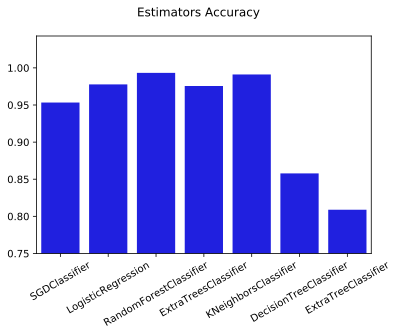

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

acc_results = {}
for key, estimator in results.items():
    y_pred = estimator.predict(x_test)
    val = accuracy_score(y_true=y_test, y_pred=y_pred)
    acc_results[key] =round(float(val), 4)
#     print(i)

print (acc_results.values())

g = sns.barplot(x=list(acc_results.keys()), y=list(acc_results.values()), color="b")
g.set_xticklabels(rotation=30, labels=list(acc_results.keys()))
g.set(ylim=(0.75, None))
plt.suptitle('Estimators Accuracy')#"Estimators Accuracy"
# final_results

### Вывод: Лучше всех по данной метрике отработал RandomForest, а сразу за ним KNeighbors. Так же еще 2 вывода:

1. Знание параметров позволяет сильно сократить время, при попытке в лоб засунуть в Грид Серч кучу параметров, мой комп считал околол 20 часов, но я так и не дождался результатов  :( Так что пришлось отменить и сократить кол - во параметров.
2. Ансамбли работают лучше, че НЕ ансамбли. Как видно из графика - гораздо лучше. 

## На все что должно было бы написанно далее у меня пока не хватило времени. Так что додлеаю позже :(

Теперь посмотрим можно ли улучшить лучший из результатов с помощью ансамблей

#### ensemble.BaggingClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)


In [16]:
EnsambleBaggingClassifier_data = {
    "model" : BaggingClassifier(),
    "params" : {

    }
}

#### ensemble.AdaBoostClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)


In [17]:
EnsambleAdaBoostClassifier_data = {
    "model" : AdaBoostClassifier(),
    "params" : {

    }
}